<a href="https://colab.research.google.com/github/PavlovaOlena/Python---Sales-analytics/blob/main/Sales_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The dataset contains information on sales of products of a company operating in the global market and selling goods in regular stores and online stores. The dataset consists of three tables:**

**events.csv** — sales over several years;
**products.csv** — product categories and their codes;
**countries.csv** — countries, regions and their codes.

**The main goal is to clean the data and conduct its analysis; find valuable insights into the company's activities.**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
%cd /content/drive/MyDrive/Mate_homework/Module_Task/

/content/drive/MyDrive/Mate_homework/Module_Task


## 1. Data overview. Understanding the data and its content.
Loading the dataset, familiarizing yourself with the contents of the columns.
Identifying key fields that connect the three tables.

To load data from files:

In [ ]:
events = pd.read_csv("events.csv")
products = pd.read_csv("products.csv")
countries = pd.read_csv("countries.csv")

*Let's get acquainted with the data, use the head(), info(), describe() methods for each table.*

In [ ]:
# Description for the first table
print(events.head())  # The first few lines
print(events.info())  # Column information, data types
print(events.describe())  # Statistical description

# Description for the second table
print(products.head())
print(products.info())
print(products.describe())

# Description for the third table
print(countries.head())
print(countries.info())
print(countries.describe())

    Order ID Order Date   Ship Date Order Priority Country Code  Product ID  \
0  100640618  10/8/2014  10/18/2014              M          NOR        2103   
1  100983083  8/11/2016   8/11/2016              C          SRB        2103   
2  101025998  7/18/2014   8/11/2014              M          NaN        7940   
3  102230632  5/13/2017   6/13/2017              L          MNE        2455   
4  103435266  8/11/2012   9/18/2012              H          SRB        1270   

  Sales Channel  Units Sold  Unit Price  Unit Cost  
0        Online       650.0      205.70     117.11  
1       Offline      1993.0      205.70     117.11  
2        Online      4693.0      668.27     502.54  
3        Online      1171.0      109.28      35.84  
4       Offline      7648.0       47.45      31.79  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order

# Table Events
*This table has the following columns:*
* **Order ID**: Unique order identifier (int64)
* **Order Date**: Order date (object)
* **Ship Date**: Order shipped date (object)
* **Order Priority**: Order priority (M, C, L, H) (object)
* **Country Code**: Order country code (e.g. NOR for Norway) (object)
* **Product ID**: Unique product identifier (int64)
* **Sales Channel**: Sales channel (e.g. Online or Offline) (object)
* **Units Sold**: Number of units sold (float64)
* **Units Sold**: Number of units sold (float64)
* **Unit Price**: Price per unit (float64)
* **Unit Cost**: Cost per unit (float64)

Rows: 1330

**There are missing values:**

There are 82 missing values ​​in the Country Code column.

There are 2 missing values ​​in the Units Sold column.

Order Date and Ship Date: Order and Ship Date dates (object type, **needs conversion to datetime type**).

Country Code: Country code of the order, but some values ​​are missing.

# Table Products
* **id**: Unique product identifier (int64)
* **item_type**: Product type (e.g. Cereal, Household, etc.) (object)

Missing values: None.

# Table Countries
* **name**: Country name (object)
* **alpha-2**: Two-letter country code (object)
* **alpha-3**: Three-letter country code (object)
* **region**: Country region (e.g. Asia) (object)
* **sub-region**: Country subregion (e.g. Southern Asia) (object)

**Missing values:**
There is 1 missing value in the alpha-2 column.

There is 1 missing value in the region and sub-region columns.

#**Statistical description:**
###For the events table:

Order ID: Nominal identifier, values ​​range from 100640618 to 999879708.

Units Sold: Both small and large quantities (2 to 9999 units) are sold.

Unit Price and Unit Cost: Prices and costs range from 9.33 to 668.27 for unit price and from 6.92 to 524.96 for unit cost.

###For the products table:

All products have unique ids with different product types.

###For the countries table:

name: There are 249 different country names, including countries from different continents and regions.

##Key fields:

Between the events and products tables: The key field is the Product ID.

Between the events and countries tables: The key field is the Country Code from the events table and the alpha-2 from the countries table.



---



##2.Data cleaning. Working with missing data, incorrect data, anomalies.

**See if there are missing values ​​in each table, assess their fate, and try to understand the reasons for their occurrence.**

In [ ]:
events_na_amount = events.isna().sum()
events_na_percent = (events_na_amount / len(events)) * 100

print("Missing values ​​in table 'events':")
print(events_na_amount)
print(events_na_percent)

Missing values ​​in table 'events':
Order ID           0
Order Date         0
Ship Date          0
Order Priority     0
Country Code      82
Product ID         0
Sales Channel      0
Units Sold         2
Unit Price         0
Unit Cost          0
dtype: int64
Order ID          0.000000
Order Date        0.000000
Ship Date         0.000000
Order Priority    0.000000
Country Code      6.165414
Product ID        0.000000
Sales Channel     0.000000
Units Sold        0.150376
Unit Price        0.000000
Unit Cost         0.000000
dtype: float64


In [ ]:
products_na_amount = products.isna().sum()
products_na_percent = (products_na_amount / len(products)) * 100

print("Missing values ​​in table 'products':")
print(products_na_amount)
print(products_na_percent)

Missing values ​​in table 'products':
id           0
item_type    0
dtype: int64
id           0.0
item_type    0.0
dtype: float64


In [ ]:
countries_na_amount = countries.isna().sum()
countries_na_percent = (countries_na_amount / len(countries)) * 100

print("Missing values ​​in table 'countries':")
print(countries_na_amount)
print(countries_na_percent)

Missing values ​​in table 'countries':
name          0
alpha-2       1
alpha-3       0
region        1
sub-region    1
dtype: int64
name          0.000000
alpha-2       0.401606
alpha-3       0.000000
region        0.401606
sub-region    0.401606
dtype: float64


**Working with missing values**

In [ ]:
missing_rows = countries[countries.isna().any(axis=1)]
print(missing_rows)

           name alpha-2 alpha-3  region          sub-region
8    Antarctica      AQ     ATA     NaN                 NaN
153     Namibia     NaN     NAM  Africa  Sub-Saharan Africa


*Fill in the information about Antarctica and Namibia:*

In [ ]:
countries.loc[countries["name"] == "Antarctica", ["region", "sub-region"]] = "Antarctica"
countries.loc[countries["name"] == "Namibia", ["alpha-2", "alpha-3"]] = ["NA", "NAM"]
countries_na_amount = countries.isna().sum()
print(countries[(countries["name"] == "Antarctica") | (countries["name"] == "Namibia")])
print(countries_na_amount)

           name alpha-2 alpha-3      region          sub-region
8    Antarctica      AQ     ATA  Antarctica          Antarctica
153     Namibia      NA     NAM      Africa  Sub-Saharan Africa
name          0
alpha-2       0
alpha-3       0
region        0
sub-region    0
dtype: int64


*Empty Units Sold will be filled with the median, and empty Country Code will be written as "Unknown".*

In [ ]:
events["Units Sold"].fillna(events["Units Sold"].median(), inplace=True)
events["Country Code"].fillna("Unknown", inplace=True)
events_na_amount = events.isna().sum()
print(events_na_amount)

Order ID          0
Order Date        0
Ship Date         0
Order Priority    0
Country Code      0
Product ID        0
Sales Channel     0
Units Sold        0
Unit Price        0
Unit Cost         0
dtype: int64


<ipython-input-13-fbc9549b7d72>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  events["Units Sold"].fillna(events["Units Sold"].median(), inplace=True)
<ipython-input-13-fbc9549b7d72>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

**Перевіремо, чи всі типи даних розпізнано правильно.**

Order Date and Ship Date: Order and ship dates, of type object, require conversion to type datetime.

In [ ]:
events["Order Date"] = pd.to_datetime(events["Order Date"])
events["Ship Date"] = pd.to_datetime(events["Ship Date"])
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        1330 non-null   int64         
 1   Order Date      1330 non-null   datetime64[ns]
 2   Ship Date       1330 non-null   datetime64[ns]
 3   Order Priority  1330 non-null   object        
 4   Country Code    1330 non-null   object        
 5   Product ID      1330 non-null   int64         
 6   Sales Channel   1330 non-null   object        
 7   Units Sold      1330 non-null   float64       
 8   Unit Price      1330 non-null   float64       
 9   Unit Cost       1330 non-null   float64       
dtypes: datetime64[ns](2), float64(3), int64(2), object(3)
memory usage: 104.0+ KB


**Сheck the data for duplicates.**

*Remove extra spaces (at the beginning, end, between words), remove tabs and newline characters:*

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        text = re.sub(r'\s+', ' ', text)  # Replacing multiple spaces with one
        text = re.sub(r'[\t\n\r]', '', text)  # Removing tabs and newlines
        text = text.strip()  # Removing leading and trailing spaces
    return text

# Apply `apply()` only to text columns
events = events.apply(lambda col: col.map(clean_text) if col.dtype == "object" else col)
products = products.apply(lambda col: col.map(clean_text) if col.dtype == "object" else col)
countries = countries.apply(lambda col: col.map(clean_text) if col.dtype == "object" else col)

*Convert all text values ​​to lowercase:*

In [ ]:
events = events.apply(lambda col: col.str.lower().str.strip() if col.dtype == "object" else col)
products = products.apply(lambda col: col.str.lower().str.strip() if col.dtype == "object" else col)
countries = countries.apply(lambda col: col.str.lower().str.strip() if col.dtype == "object" else col)

*Сheck if there are Cyrillic characters in the tables:*

In [ ]:
# Function for checking Cyrillic characters
def contains_cyrillic(text):
    return bool(re.search(r'[а-яА-ЯЁё]', str(text)))  # Convert to str to avoid errors

# Checking each column separately (to avoid the deprecated applymap function)
events_mask = events.map(contains_cyrillic)
products_mask = events.map(contains_cyrillic)
countries_mask = events.map(contains_cyrillic)

# Display all lines that contain at least one Cyrillic letter
events_with_cyrillic = events[events_mask.any(axis=1)]
products_with_cyrillic = products[products_mask.any(axis=1)]
countries_with_cyrillic = countries[countries_mask.any(axis=1)]
print(events_with_cyrillic)
print(products_with_cyrillic)
print(countries_with_cyrillic)

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []
Empty DataFrame
Columns: [id, item_type]
Index: []
Empty DataFrame
Columns: [name, alpha-2, alpha-3, region, sub-region]
Index: []


<ipython-input-23-5e927556a0f0>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  products_with_cyrillic = products[products_mask.any(axis=1)]
<ipython-input-23-5e927556a0f0>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  countries_with_cyrillic = countries[countries_mask.any(axis=1)]


*There are no Cyrillic characters in the tables.*

*Check if we have duplicates in the tables:*

In [ ]:
events_duplicate_rows = events[events.duplicated()]
products_duplicate_rows = products[products.duplicated()]
countries_duplicate_rows = countries[countries.duplicated()]

print(f"Number of duplicates in 'events': {len(events_duplicate_rows)}")
print(f"Number of duplicates in 'products': {len(products_duplicate_rows)}")
print(f"Number of duplicates in 'countries': {len(countries_duplicate_rows)}")

Number of duplicates in 'events': 0
Number of duplicates in 'products': 0
Number of duplicates in 'countries': 0


**Сheck the data for anomalies.**

In [ ]:
print(events[events["Units Sold"] < 0])  # Negative sales are an anomaly
print(events[events["Unit Price"] < 0])  # Negative price is an anomaly
print(events[events["Unit Cost"] < 0])

Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []
Empty DataFrame
Columns: [Order ID, Order Date, Ship Date, Order Priority, Country Code, Product ID, Sales Channel, Units Sold, Unit Price, Unit Cost]
Index: []


In [ ]:
print(events.describe())

           Order ID                     Order Date  \
count  1.330000e+03                           1330   
mean   5.412048e+08  2013-10-12 06:09:12.180451072   
min    1.006406e+08            2010-01-01 00:00:00   
25%    3.190004e+08            2011-12-16 06:00:00   
50%    5.387164e+08            2013-10-17 00:00:00   
75%    7.544628e+08            2015-08-28 18:00:00   
max    9.998797e+08            2017-07-23 00:00:00   
std    2.573882e+08                            NaN   

                           Ship Date   Product ID   Units Sold   Unit Price  \
count                           1330  1330.000000  1330.000000  1330.000000   
mean   2013-11-06 00:46:33.383458816  5788.096241  4952.216541   264.893541   
min              2010-01-10 00:00:00  1270.000000     2.000000     9.330000   
25%              2012-01-03 00:00:00  3127.000000  2360.750000    81.730000   
50%              2013-11-09 00:00:00  5988.000000  4962.000000   154.060000   
75%              2015-10-03 18:00:00  8

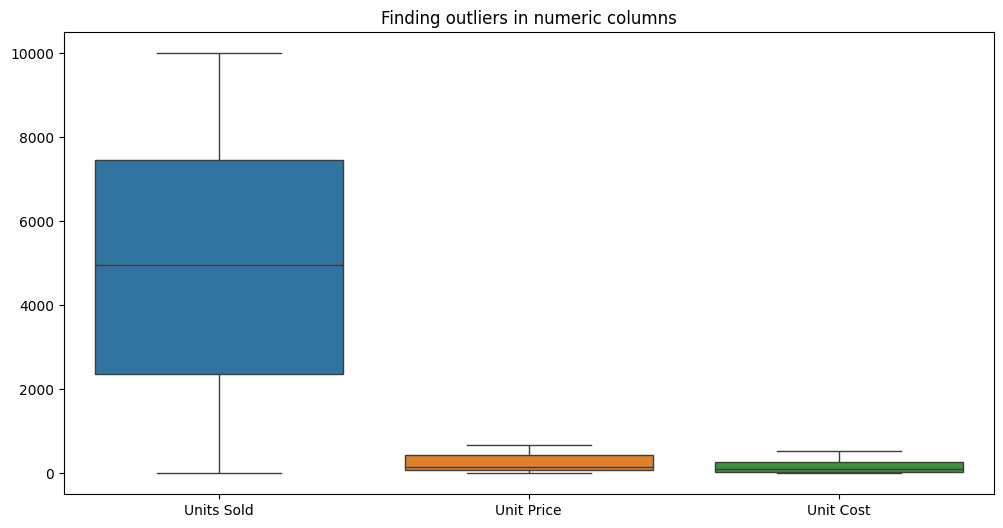

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=events[["Units Sold", "Unit Price", "Unit Cost"]])
plt.title("Finding outliers in numeric columns")
plt.show()

In [ ]:
print(events["Order Priority"].unique())
print(events["Sales Channel"].unique())

['m' 'c' 'l' 'h']
['online' 'offline']


## 3. Data analysis and visualization. Data analysis and visualization, finding valuable insights.

**Combine three tables into one dataframe. Remove columns not needed for analysis. Rename columns if necessary.**

*Data connection and cleaning:*

In [ ]:
# Join 'events' and 'products' by the 'Product ID' and 'id' fields
merged_data = pd.merge(events, products, left_on='Product ID', right_on='id', how='left')

# Join the result with 'countries' by the 'Country Code' and 'alpha-3' fields
merged_data = pd.merge(merged_data, countries, left_on='Country Code', right_on='alpha-3', how='left')

# Remove unnecessary columns, leaving only the necessary ones
merged_data = merged_data.drop(columns=['alpha-3', 'alpha-2', 'sub-region'])

# Renaming columns for convenience
merged_data = merged_data.rename(columns={
    'Order ID': 'Order_ID',
    'Order Date': 'Order_Date',
    'Ship Date': 'Ship_Date',
    'Order Priority': 'Order_Priority',
    'Country Code': 'Country_Code',
    'Product ID': 'Product_ID',
    'Sales Channel': 'Sales_Channel',
    'Units Sold': 'Units_Sold',
    'Unit Price': 'Unit_Price',
    'Unit Cost': 'Unit_Cost',
    'item_type': 'Product_Type',
    'name': 'Country_Name'
})

# Checking the result
print(merged_data.head())

    Order_ID Order_Date  Ship_Date Order_Priority Country_Code  Product_ID  \
0  100640618 2014-10-08 2014-10-18              m          nor        2103   
1  100983083 2016-08-11 2016-08-11              c          srb        2103   
2  101025998 2014-07-18 2014-08-11              m      unknown        7940   
3  102230632 2017-05-13 2017-06-13              l          mne        2455   
4  103435266 2012-08-11 2012-09-18              h          srb        1270   

  Sales_Channel  Units_Sold  Unit_Price  Unit_Cost    id Product_Type  \
0        online       650.0      205.70     117.11  2103       cereal   
1       offline      1993.0      205.70     117.11  2103       cereal   
2        online      4693.0      668.27     502.54  7940    household   
3        online      1171.0      109.28      35.84  2455      clothes   
4       offline      7648.0       47.45      31.79  1270    beverages   

  Country_Name  region  
0       norway  europe  
1       serbia  europe  
2          NaN   

**Сalculate the key metrics of the company's performance: total number of orders, total profit, total number of countries covered, etc.**

In [ ]:
time_min = merged_data['Order_Date'].min()
time_max = merged_data['Order_Date'].max()
print(f"Data for the period from {time_min} to {time_max}")

Data for the period from 2010-01-01 00:00:00 to 2017-07-23 00:00:00


In [ ]:
total_orders = merged_data['Order_ID'].nunique()
print(f"Total number of orders: {total_orders}")

Total number of orders: 1330


In [ ]:
merged_data['Profit'] = (merged_data['Unit_Price'] - merged_data['Unit_Cost']) * merged_data['Units_Sold']
total_profit = merged_data['Profit'].sum()
print(f"Total profit: {total_profit:.2f}")

Total profit: 501842633.12


In [ ]:
total_countries = merged_data['Country_Name'].nunique()
print(f"Total number of countries covered: {total_countries}")

Total number of countries covered: 45


In [ ]:
avg_units_per_order = merged_data['Units_Sold'].mean()
print(f"Average sales volume per order: {avg_units_per_order:.2f} units")

Average sales volume per order: 4952.22 units


In [ ]:
merged_data['Profit'] = merged_data['Unit_Price'] - merged_data['Unit_Cost']
profit_per_order = merged_data.groupby('Order_ID')['Profit'].sum()
avg_profit_per_order = profit_per_order.mean()
print(f"Average profit per order: {avg_profit_per_order:.2f}")

Average profit per order: 77.65


In [ ]:
profit_per_product = merged_data.groupby('Product_Type')['Profit'].sum()
most_profitable_product = profit_per_product.idxmax()
print(f"The most profitable product: {most_profitable_product}")

The most profitable product: cosmetics


In [ ]:
sales_channel_sales = merged_data.groupby('Sales_Channel')['Units_Sold'].sum()
most_popular_channel = sales_channel_sales.idxmax()
print(f"The most popular sales channel: {most_popular_channel}")

The most popular sales channel: offline


In [ ]:
#Average income by country, sorted from highest to lowest
avg_profit_per_country = merged_data.groupby('Country_Name')['Profit'].mean().sort_values(ascending=False)

print("Average income by country (from highest to lowest):")
print(avg_profit_per_country)

Average income by country (from highest to lowest):
Country_Name
albania                   100.196667
portugal                   94.804800
poland                     92.702143
ukraine                    92.186970
slovakia                   90.866333
montenegro                 89.811071
croatia                    88.769444
sweden                     86.415862
czech republic             86.216452
united kingdom             86.025652
monaco                     85.868462
bosnia and herzegovina     85.176061
hungary                    85.072400
iceland                    85.030000
lithuania                  81.791200
russia                     81.178438
bulgaria                   81.155000
switzerland                80.955000
liechtenstein              80.617917
malta                      80.290000
norway                     80.241667
germany                    79.689615
belarus                    76.729643
luxembourg                 76.606071
andorra                    76.243750
san marino

In [ ]:
# Make sure Order_Date is in datetime format
merged_data['Order_Date'] = pd.to_datetime(merged_data['Order_Date'])

# Grouping sales by month (excluding year)
sales_trend_by_month = merged_data.groupby(merged_data['Order_Date'].dt.month)['Units_Sold'].sum()

# Sort by months (largest to smallest)
sales_trend_by_month_sorted = sales_trend_by_month.sort_values(ascending=False)

print("Sales trend by month (regardless of year):")
print(sales_trend_by_month_sorted)


Sales trend by month (regardless of year):
Order_Date
3     693714.0
1     637190.0
6     630928.0
7     603090.0
5     565881.0
2     531558.0
12    514130.0
10    507490.0
11    500730.0
9     491336.0
4     487292.0
8     423109.0
Name: Units_Sold, dtype: float64


In [ ]:
priority_orders = merged_data.groupby('Order_Priority')['Order_ID'].count()
print("Distribution of orders by priority:")
print(priority_orders)

Distribution of orders by priority:
Order_Priority
c    307
h    335
l    334
m    354
Name: Order_ID, dtype: int64


**Sales analysis (revenue, expenses, profits, product popularity) and corresponding visualizations by:**

1. **product categories;**

2. **geography (countries, regions);**

3. **sales channels (online or offline).**

In [ ]:
# Calculation of income, expenses and profit
merged_data['Revenue'] = merged_data['Unit_Price'] * merged_data['Units_Sold']
merged_data['Cost'] = merged_data['Unit_Cost'] * merged_data['Units_Sold']
merged_data['Profit'] = merged_data['Revenue'] - merged_data['Cost']

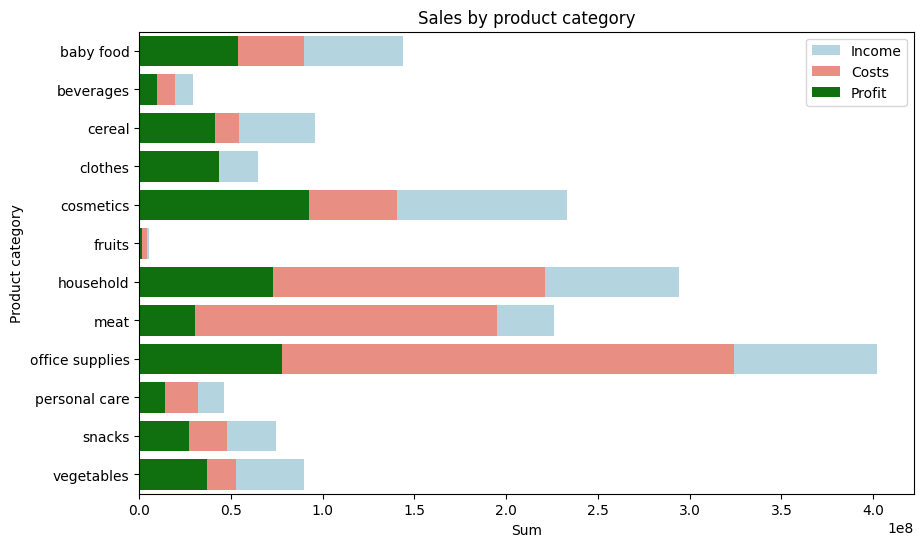

In [ ]:
# Grouping data by product category
product_sales = merged_data.groupby('Product_Type').agg({'Revenue': 'sum', 'Cost': 'sum', 'Profit': 'sum'}).reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='Product_Type', data=product_sales, color='lightblue', label='Income')
sns.barplot(x='Cost', y='Product_Type', data=product_sales, color='salmon', label='Costs')
sns.barplot(x='Profit', y='Product_Type', data=product_sales, color='green', label='Profit')

plt.title('Sales by product category')
plt.xlabel('Sum')
plt.ylabel('Product category')
plt.legend()
plt.show()

*The most profitable product categories are "cosmetics", "office supplies" and "household".*

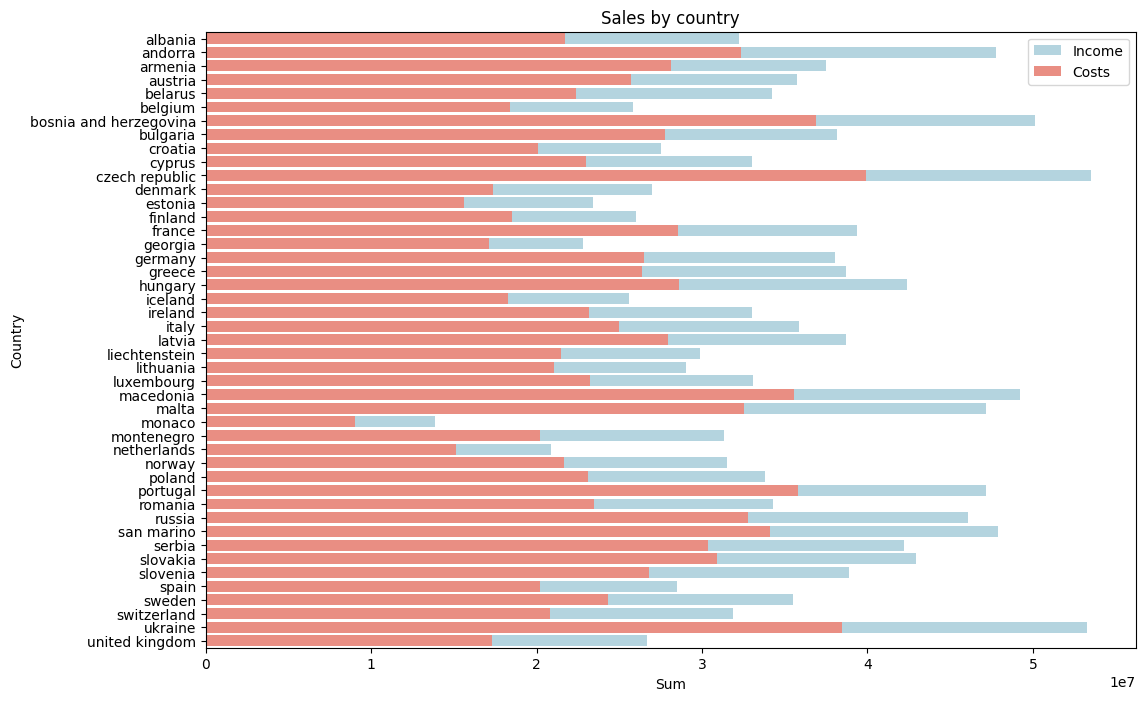

In [ ]:
# Grouping data by country
country_sales = merged_data.groupby('Country_Name').agg({'Revenue': 'sum', 'Cost': 'sum'}).reset_index()

# Visualization
plt.figure(figsize=(12,8))
sns.barplot(x='Revenue', y='Country_Name', data=country_sales, color='lightblue', label='Income')
sns.barplot(x='Cost', y='Country_Name', data=country_sales, color='salmon', label='Costs')

plt.title('Sales by country')
plt.xlabel('Sum')
plt.ylabel('Country')
plt.legend()
plt.show()

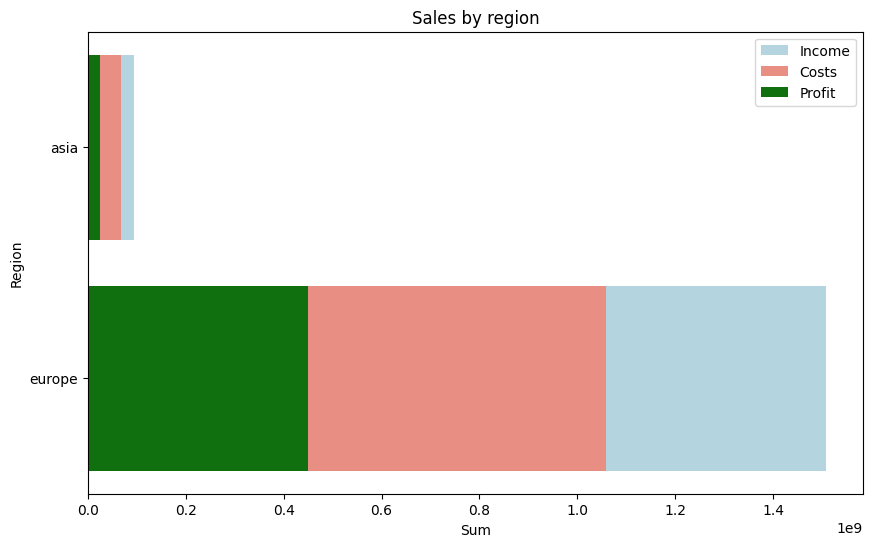

In [ ]:
# Grouping data by region
region_sales = merged_data.groupby('region').agg({'Revenue': 'sum', 'Cost': 'sum', 'Profit': 'sum'}).reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='region', data=region_sales, color='lightblue', label='Income')
sns.barplot(x='Cost', y='region', data=region_sales, color='salmon', label='Costs')
sns.barplot(x='Profit', y='region', data=region_sales, color='green', label='Profit')

plt.title('Sales by region')
plt.xlabel('Sum')
plt.ylabel('Region')
plt.legend()
plt.show()

*Sales in European countries bring in significantly higher profits.*

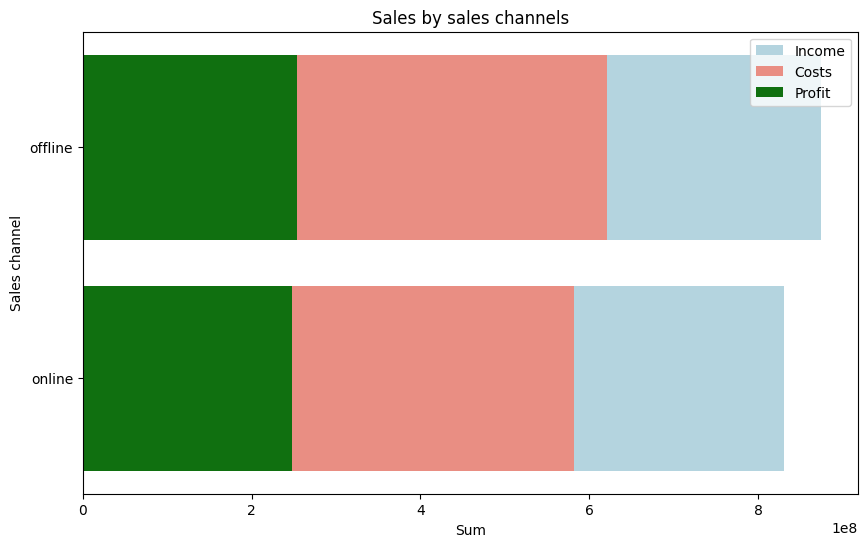

In [ ]:
# Grouping data by sales channels
channel_sales = merged_data.groupby('Sales_Channel').agg({'Revenue': 'sum', 'Cost': 'sum', 'Profit': 'sum'}).reset_index()

# Visualization
plt.figure(figsize=(10,6))
sns.barplot(x='Revenue', y='Sales_Channel', data=channel_sales, color='lightblue', label='Income')
sns.barplot(x='Cost', y='Sales_Channel', data=channel_sales, color='salmon', label='Costs')
sns.barplot(x='Profit', y='Sales_Channel', data=channel_sales, color='green', label='Profit')

plt.title('Sales by sales channels')
plt.xlabel('Sum')
plt.ylabel('Sales channel')
plt.legend()
plt.show()

*We see that "offline" does not significantly exceed "online" sales, due to higher cost. The profit is the same.*

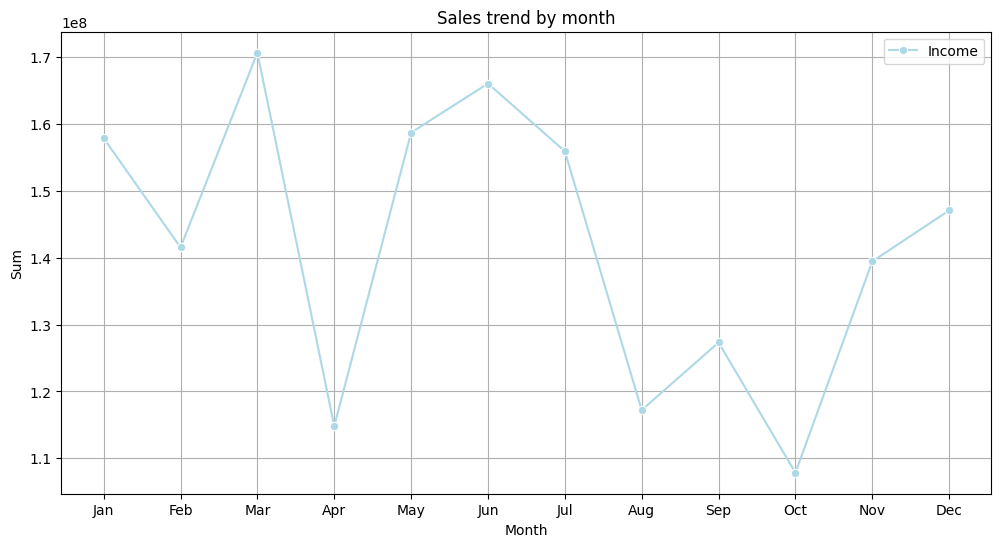

In [ ]:
# Add a column with the month number
merged_data['Month'] = merged_data['Order_Date'].dt.month

# We aggregate income and profit by month (regardless of year)
# Changed 'Sales' to 'Revenue' as 'Sales' column does not exist
monthly_sales = merged_data.groupby('Month').agg({'Revenue': 'sum'}).reset_index()

# Trend visualization
plt.figure(figsize=(12, 6))
# Changed 'Sales' to 'Revenue' to match the aggregation column
sns.lineplot(data=monthly_sales, x='Month', y='Revenue', label='Income', color='lightblue', marker='o')
plt.title('Sales trend by month')
plt.xlabel('Month')
plt.ylabel('Sum')
plt.legend()
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

*Best sales in March, January and June, and lowest in October, August and April.*

**Let's analyze the time interval between the order and its shipment and make the appropriate visualizations in the context of:**

* **product categories;**
* **countries;**
* **regions.**

In [ ]:
# Convert Order Date and Ship Date to datetime format
merged_data['Order_Date'] = pd.to_datetime(merged_data['Order_Date'])
merged_data['Ship_Date'] = pd.to_datetime(merged_data['Ship_Date'])

# Calculate the interval between order and shipment
merged_data['Order_to_Ship_Time'] = (merged_data['Ship_Date'] - merged_data['Order_Date']).dt.days

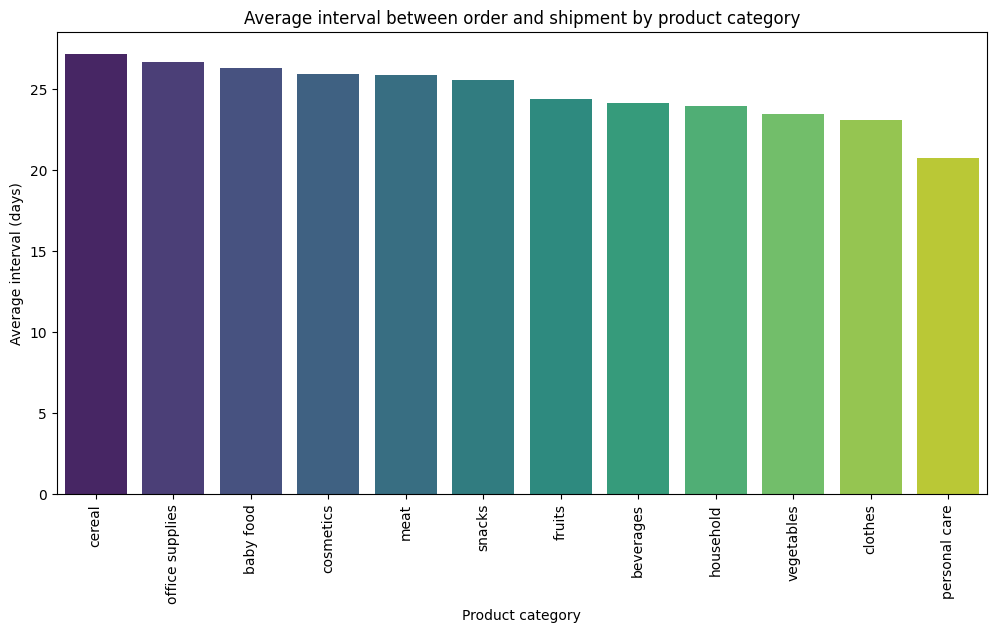

In [ ]:
# Analysis of the average time interval by product category
category_order_to_ship = merged_data.groupby('Product_Type')['Order_to_Ship_Time'].mean().sort_values(ascending=False)

# Visualization of the average time interval by product category
plt.figure(figsize=(12, 6))
sns.barplot(x=category_order_to_ship.index, y=category_order_to_ship.values, palette='viridis', hue=category_order_to_ship.index)
plt.title('Average interval between order and shipment by product category')
plt.xlabel('Product category')
plt.ylabel('Average interval (days)')
plt.xticks(rotation=90)
plt.show()


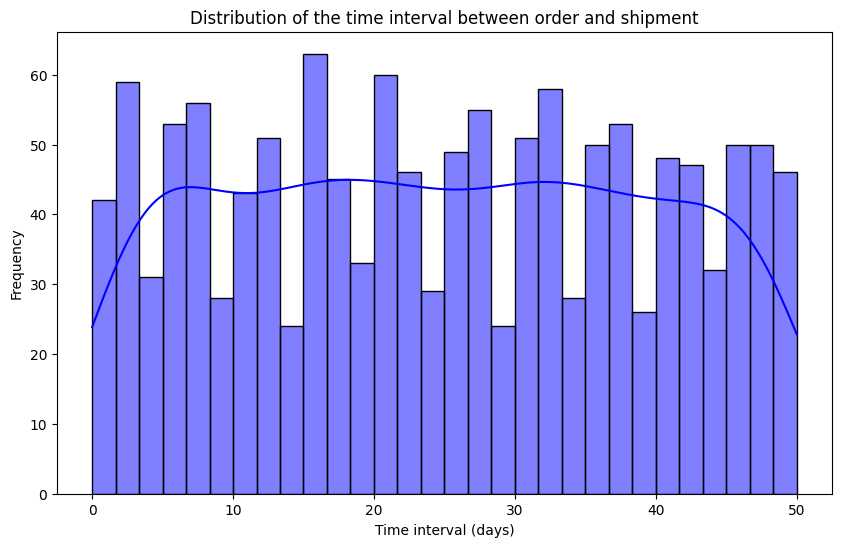

In [ ]:
# Histogram of the distribution of time intervals
plt.figure(figsize=(10, 6))
sns.histplot(merged_data['Order_to_Ship_Time'], bins=30, kde=True, color='blue')
plt.title('Distribution of the time interval between order and shipment')
plt.xlabel('Time interval (days)')
plt.ylabel('Frequency')
plt.show()

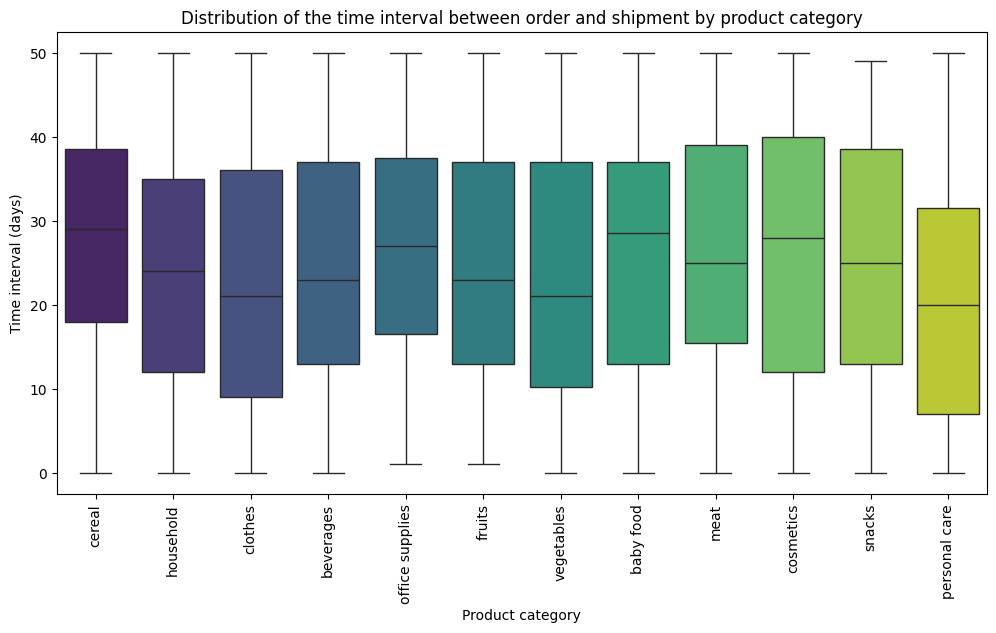

In [ ]:
# Box plot for time intervals by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product_Type', y='Order_to_Ship_Time', data=merged_data, palette='viridis', hue='Product_Type')
plt.title('Distribution of the time interval between order and shipment by product category')
plt.xlabel('Product category')
plt.ylabel('Time interval (days)')
plt.xticks(rotation=90)
plt.show()

**Let's analyze whether profit depends on the time required to ship the goods.**

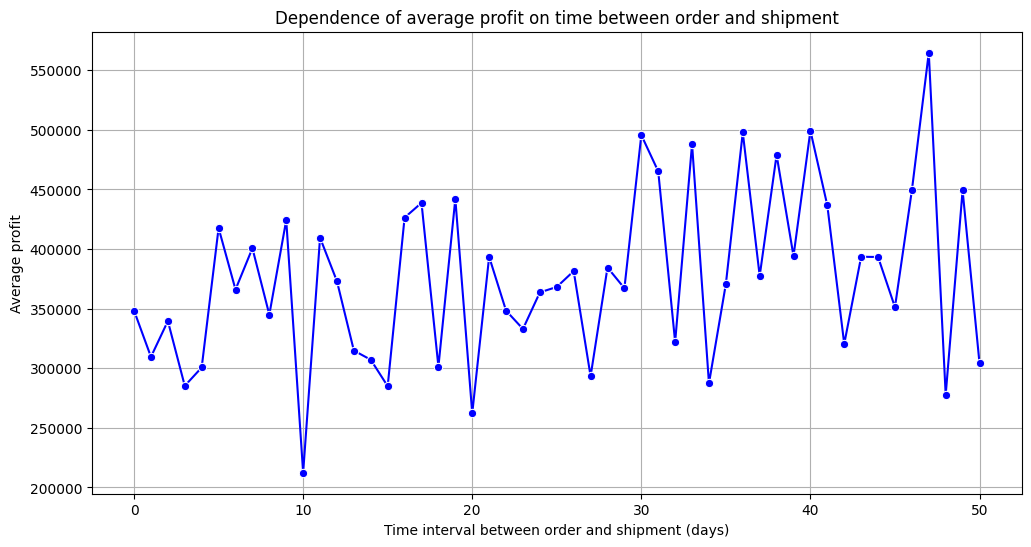

In [ ]:
# Adding a "Profit" column
merged_data['Profit'] = (merged_data['Unit_Price'] - merged_data['Unit_Cost']) * merged_data['Units_Sold']

# Data aggregation: average profit over time intervals
profit_by_time = merged_data.groupby('Order_to_Ship_Time')['Profit'].mean()

# Visualization of the relationship between shipping time and average profit
plt.figure(figsize=(12, 6))
sns.lineplot(x=profit_by_time.index, y=profit_by_time.values, marker='o', color='b')
plt.title('Dependence of average profit on time between order and shipment')
plt.xlabel('Time interval between order and shipment (days)')
plt.ylabel('Average profit')
plt.grid(True)
plt.show()

*The line on the graph increases from left to right, meaning that as delivery time increases, so does average profit. This may indicate that longer delivery times are associated with more complex or expensive orders.*

**Analyze the dynamics of sales (over time) by product categories, countries, and regions using visualization, and identify the main trends.**

<Figure size 1200x600 with 0 Axes>

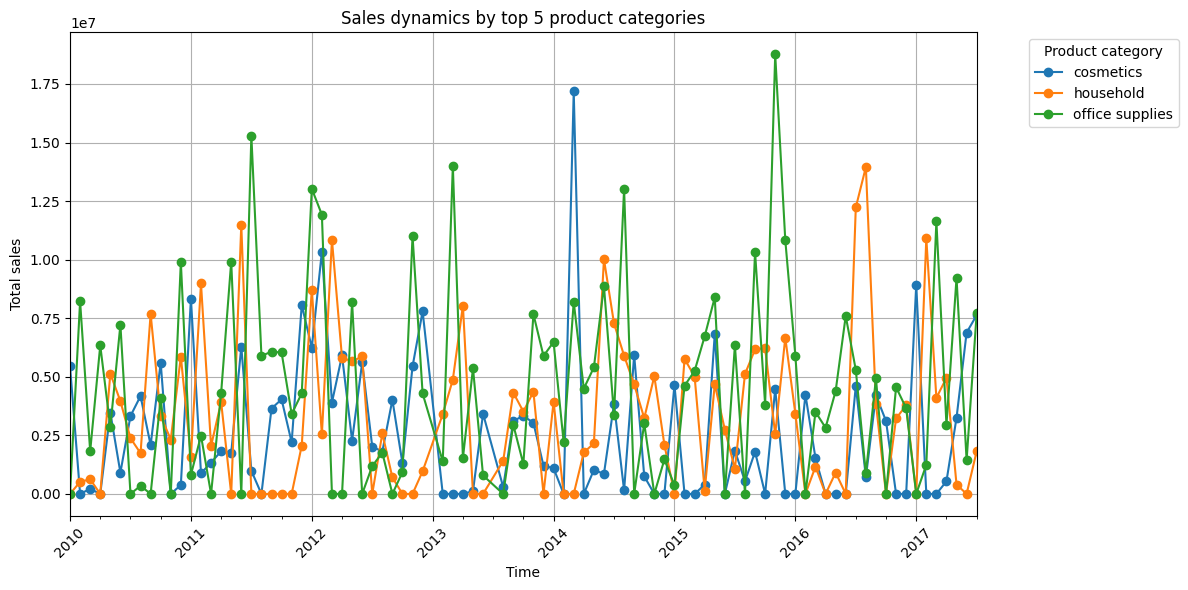

In [ ]:
# Aggregating total sales by product category
# Changed 'Sales' to 'Revenue' as 'Sales' column does not exist
total_sales_by_category = merged_data.groupby('Product_Type')['Revenue'].sum()

# Selection of the top 5 categories with the highest sales
top_5_categories = total_sales_by_category.nlargest(3).index

# Add a 'Year-Month' column for time series analysis
merged_data['Year-Month'] = merged_data['Order_Date'].dt.to_period('M')

# Aggregation of sales by category per month, limited to top 5 categories
sales_by_category_top5 = merged_data[merged_data['Product_Type'].isin(top_5_categories)]
# Changed 'Sales' to 'Revenue' to match the aggregation column
sales_by_category_top5 = sales_by_category_top5.groupby(['Year-Month', 'Product_Type'])['Revenue'].sum().unstack().fillna(0)

# Visualization of sales dynamics by top 5 product categories
plt.figure(figsize=(12, 6))
sales_by_category_top5.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales dynamics by top 5 product categories')
plt.xlabel('Time')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.legend(title='Product category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

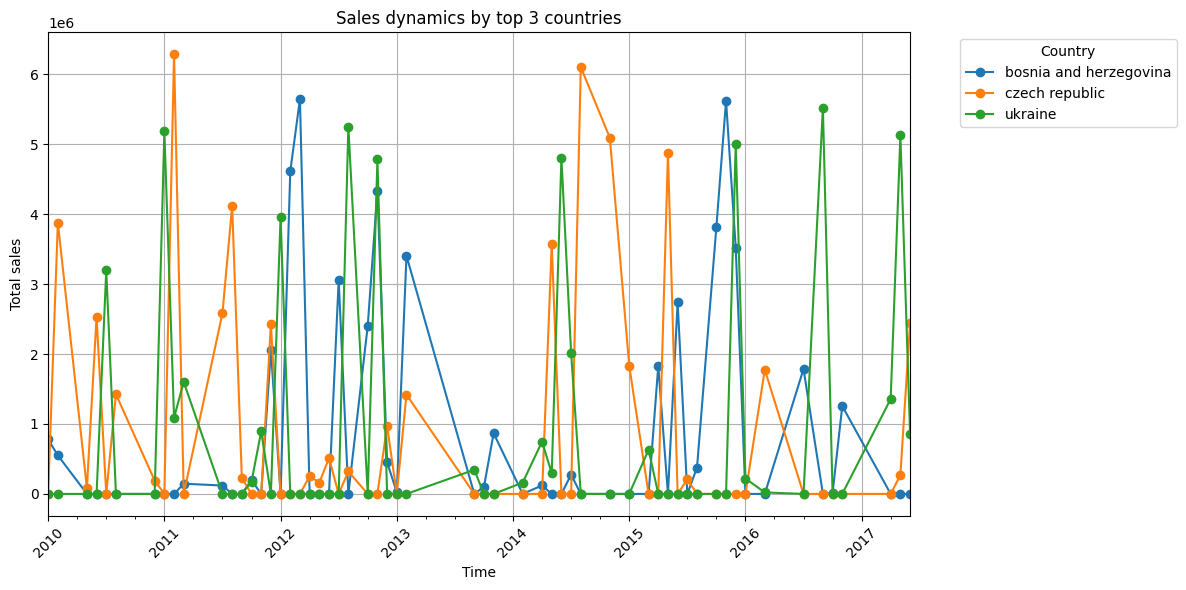

In [ ]:
# Calculating total sales by country
total_sales_by_country = merged_data.groupby('Country_Name')['Revenue'].sum()

# Removing "Unknown" from data
merged_data = merged_data[merged_data['Country_Name'] != 'unknown']

# Selection of the top 3 countries with the highest sales
top_3_countries = total_sales_by_country.nlargest(3).index

# Add a 'Year-Month' column for time series analysis
merged_data['Year-Month'] = merged_data['Order_Date'].dt.to_period('M') # This line was already present in the code but is included for context

# Aggregation of sales by country per month, limited to top 3 countries
sales_by_country_top3 = merged_data[merged_data['Country_Name'].isin(top_3_countries)]
sales_by_country_top3 = sales_by_country_top3.groupby(['Year-Month', 'Country_Name'])['Revenue'].sum().unstack().fillna(0) # Changed 'Sales' to 'Revenue'

# Visualization of sales dynamics by top 3 countries
plt.figure(figsize=(12, 6))
sales_by_country_top3.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales dynamics by top 3 countries')
plt.xlabel('Time')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

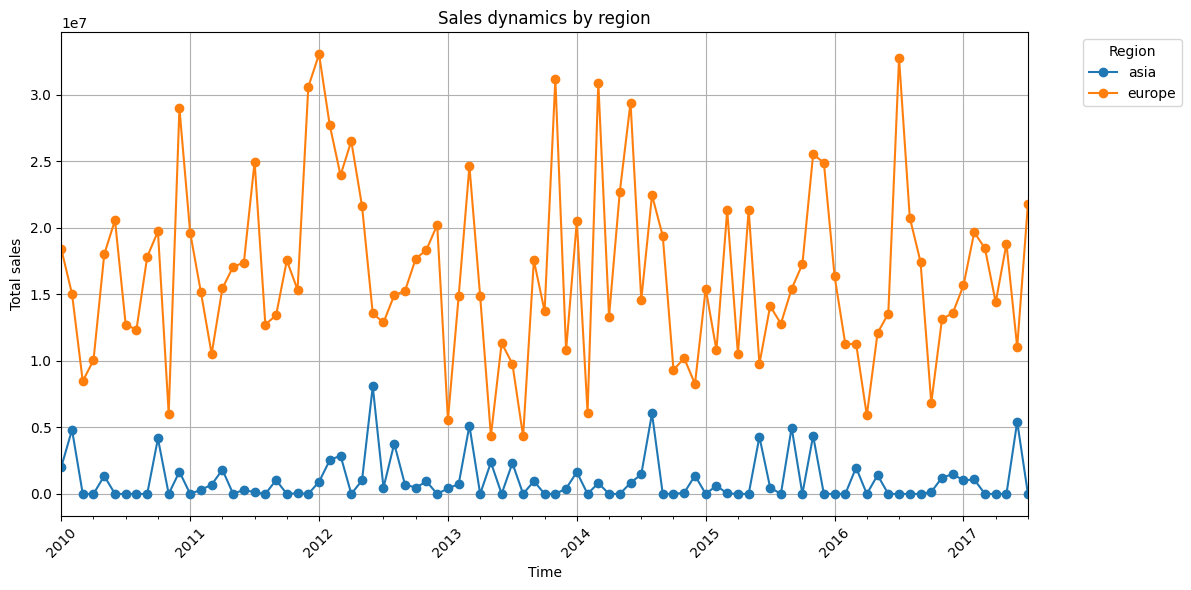

In [ ]:
# Aggregation of sales by region per month
sales_by_region = merged_data.groupby(['Year-Month', 'region'])['Revenue'].sum().unstack().fillna(0)

# Visualization of sales dynamics by region
plt.figure(figsize=(12, 6))
sales_by_region.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales dynamics by region')
plt.xlabel('Time')
plt.ylabel('Total sales')
plt.xticks(rotation=45)
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



**Analysis of product sales by day of the week.**

<Figure size 1200x600 with 0 Axes>

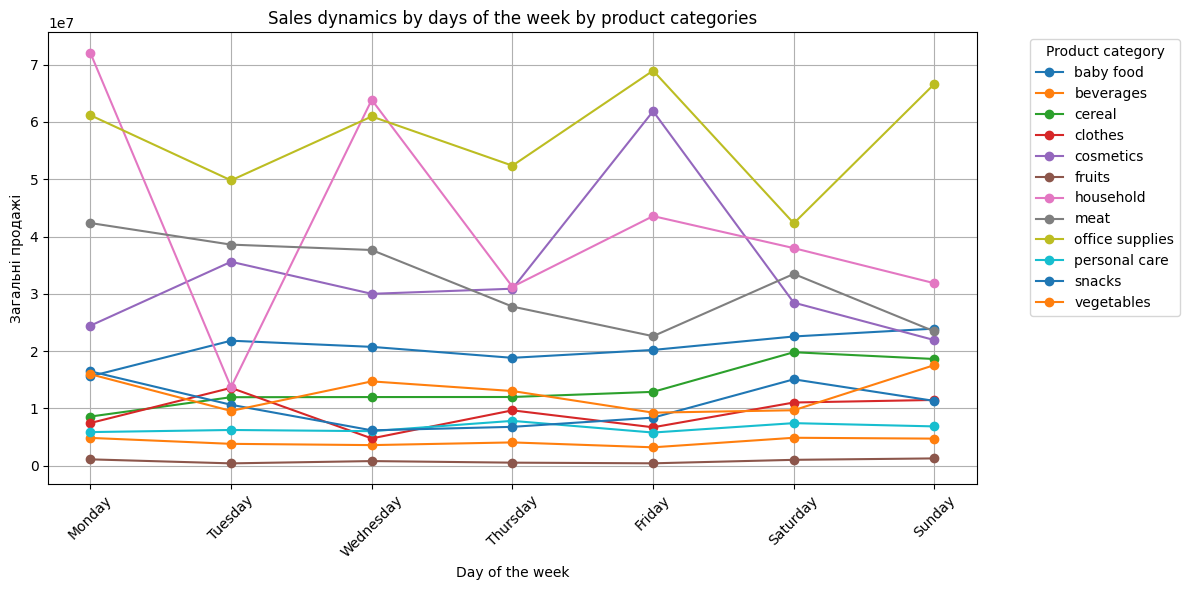

In [ ]:
# Add a column with the day of the week
merged_data['Day_of_Week'] = merged_data['Order_Date'].dt.day_name()

# Aggregation of sales by days of the week and product categories
sales_by_day_of_week = merged_data.groupby(['Day_of_Week', 'Product_Type'])['Revenue'].sum().unstack().fillna(0)

# Sort the days of the week in order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_by_day_of_week = sales_by_day_of_week.loc[ordered_days]

# Visualization of sales dynamics by days of the week and product categories
plt.figure(figsize=(12, 6))
sales_by_day_of_week.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Sales dynamics by days of the week by product categories')
plt.xlabel('Day of the week')
plt.ylabel('Загальні продажі')
plt.xticks(rotation=45)
plt.legend(title='Product category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



---



## 5. Reporting

#Conclusions that can be drawn based on the analysis of the company's sales data:
We analyze data for the period from 2010-01-01 to 2017-07-22
Total number of orders: 1330
Total profit: 501842633.12
Total number of countries covered: 45
Average profit per order: 77.83

##Focus on profitable segments:
**Product categories: **The company should focus its efforts on promoting and selling the most profitable product categories, such as "cosmetics", "office supplies" and "household". This may include marketing campaigns, pricing optimization and logistics improvements for these categories.

**Geography:** Sales in European countries bring the highest profits. The company should consider expanding its presence in European markets by investing in localized marketing strategies and partnerships. Leading countries include Albania, Portugal, Poland, and Ukraine.

**Sales channels:** We see that offline sales do not significantly exceed online sales due to higher cost. Both sales channels generate the same profit. Online sales have significant growth potential. The company should invest in developing its online platform by improving the user interface, expanding the range of products, and offering convenient payment and delivery methods. Offline stores should provide a high level of customer service.

**Delivery time:** There is a slight correlation between delivery time and profit. The line on the graph increases from left to right, which means that as delivery time increases, average profit also increases. This may mean that longer delivery times are associated with more complex or expensive orders. It is worth working on reducing delivery times.